# **Data Exploratory**

In [ ]:
import pandas as pd
import numpy as np
!pip install geopandas
!pip install pyproj
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive           
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Final PRoject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/.shortcut-targets-by-id/1T98Lv-9QiRbA6FXEMM9Ee_7sJAAsnhPH/Colab Notebooks/Final PRoject


### **Dataset Import**

In [ ]:
listings = pd.read_csv("listings.csv")
print (f" Listings dataset shape: {listings.shape}")
listings.head(10)

 Listings dataset shape: (42931, 18)


<ipython-input-5-2dad1b1cbf78>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv("listings.csv")


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN
5,29628,"Comfortable, Sunny Room",127608,Chris,Brooklyn,Clinton Hill,40.68292,-73.96381,Private room,93,3,350,2023-02-27,2.25,1,145,48,NaN
6,5586,Rooftop Deck/City Views. Great Apt,8526,Susan,Manhattan,Upper East Side,40.76076,-73.96156,Entire home/apt,295,4,45,2022-10-03,0.27,1,1,4,NaN
7,5803,"Lovely, Cozy, Room 1, BEST AREA; Legal Rental",9744,Laurie,Brooklyn,South Slope,40.66801,-73.98784,Private room,124,3,223,2023-02-13,1.32,3,164,17,NaN
8,31130,Most Central Location!,117287,Lara Nicole,Manhattan,Hell's Kitchen,40.76720,-73.98464,Private room,200,1,68,2021-10-01,0.44,4,310,0,NaN
9,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,189,2023-02-04,1.13,1,207,5,NaN


In [ ]:
listings.columns
#Get all column names.

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [ ]:
listings.dtypes
#Get data type of each column.

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

**Numerical:** id, host_id, latitude, longitude, price, minimum_nights, number_of_reviews, reivews_per_month, calculated_host_listings_count, availability_365, number_of_reviews.ltm. \
**Categorical:** name, host_name, neighbourhood_group, neighbourhood, room_type, last_review, license.

## **Descriptive Statistics for the original dataset.**

In [ ]:
orig_desStats = listings.drop('name', axis=1).describe(include="all")
orig_desStats.transpose()
#Generate descriptive statistics for all variables. 

<ipython-input-43-05bb54a70654>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  orig_desStats = listings.drop('name', axis=1).describe(include="all")


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
id,42931.0,NaN,NaN,NaN,NaT,NaT,222277244526372224.0,334421302203795328.0,2595.0,19404736.0,43374815.0,630501597262169088.0,840466047136140160.0
host_id,42931.0,NaN,NaN,NaN,NaT,NaT,151601209.021919,162130107.567557,1678.0,16085328.0,74338125.0,268069240.5,503872891.0
host_name,42926,9831,Blueground,526,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood_group,42931,5,Manhattan,17658,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,42931,223,Bedford-Stuyvesant,3086,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,42931.0,NaN,NaN,NaN,NaT,NaT,40.728273,0.05764,40.500314,40.687485,40.72404,40.762293,40.91138
longitude,42931.0,NaN,NaN,NaN,NaT,NaT,-73.943665,0.056627,-74.251907,-73.98175,-73.95262,-73.924035,-73.71087
room_type,42931,4,Entire home/apt,24279,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,42931.0,NaN,NaN,NaN,NaT,NaT,200.307167,895.082911,0.0,75.0,125.0,200.0,99000.0
minimum_nights,42931.0,NaN,NaN,NaN,NaT,NaT,18.111178,27.462513,1.0,2.0,7.0,30.0,1250.0


## **Create GeoPandas DataFrame for mapping.**

In [ ]:
# Load shapefile or GeoJSON data for the map boundaries (e.g., neighborhood group boundaries)
mapBoundaries = gpd.read_file('NYC.shx')

# Create a GeoDataFrame from the DataFrame with neighborhood data
geo_listings = gpd.GeoDataFrame(listings, geometry=gpd.points_from_xy(listings.longitude, listings.latitude))

# Perform a spatial join to assign each neighborhood to a neighborhood group based on the map boundaries
geo_listings = gpd.sjoin(geo_listings, mapBoundaries, op='within')

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3473: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-6-379d145b0848>:8: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84", ...

  geo_listings = gpd.sjoin(geo_listings, mapBoundaries, op='within')


## **Get NYC Map Boundaries.**

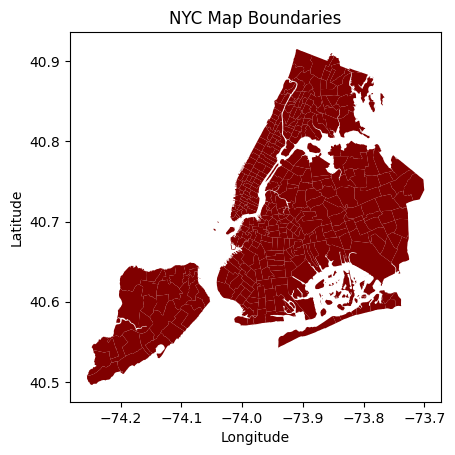

In [ ]:
# Read the shapefile data using geopandas
mapBoundaries = gpd.read_file('NYC.shx')
# Plot the shapefile data
mapBoundaries.plot(color="maroon")

# Customize the plot
plt.title('NYC Map Boundaries')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

## **Neighbourhood_group and Neighbourhood attributes.**

**Distributions of Airbnb listings in each neighborhood in corresponding neighbourhood group.**

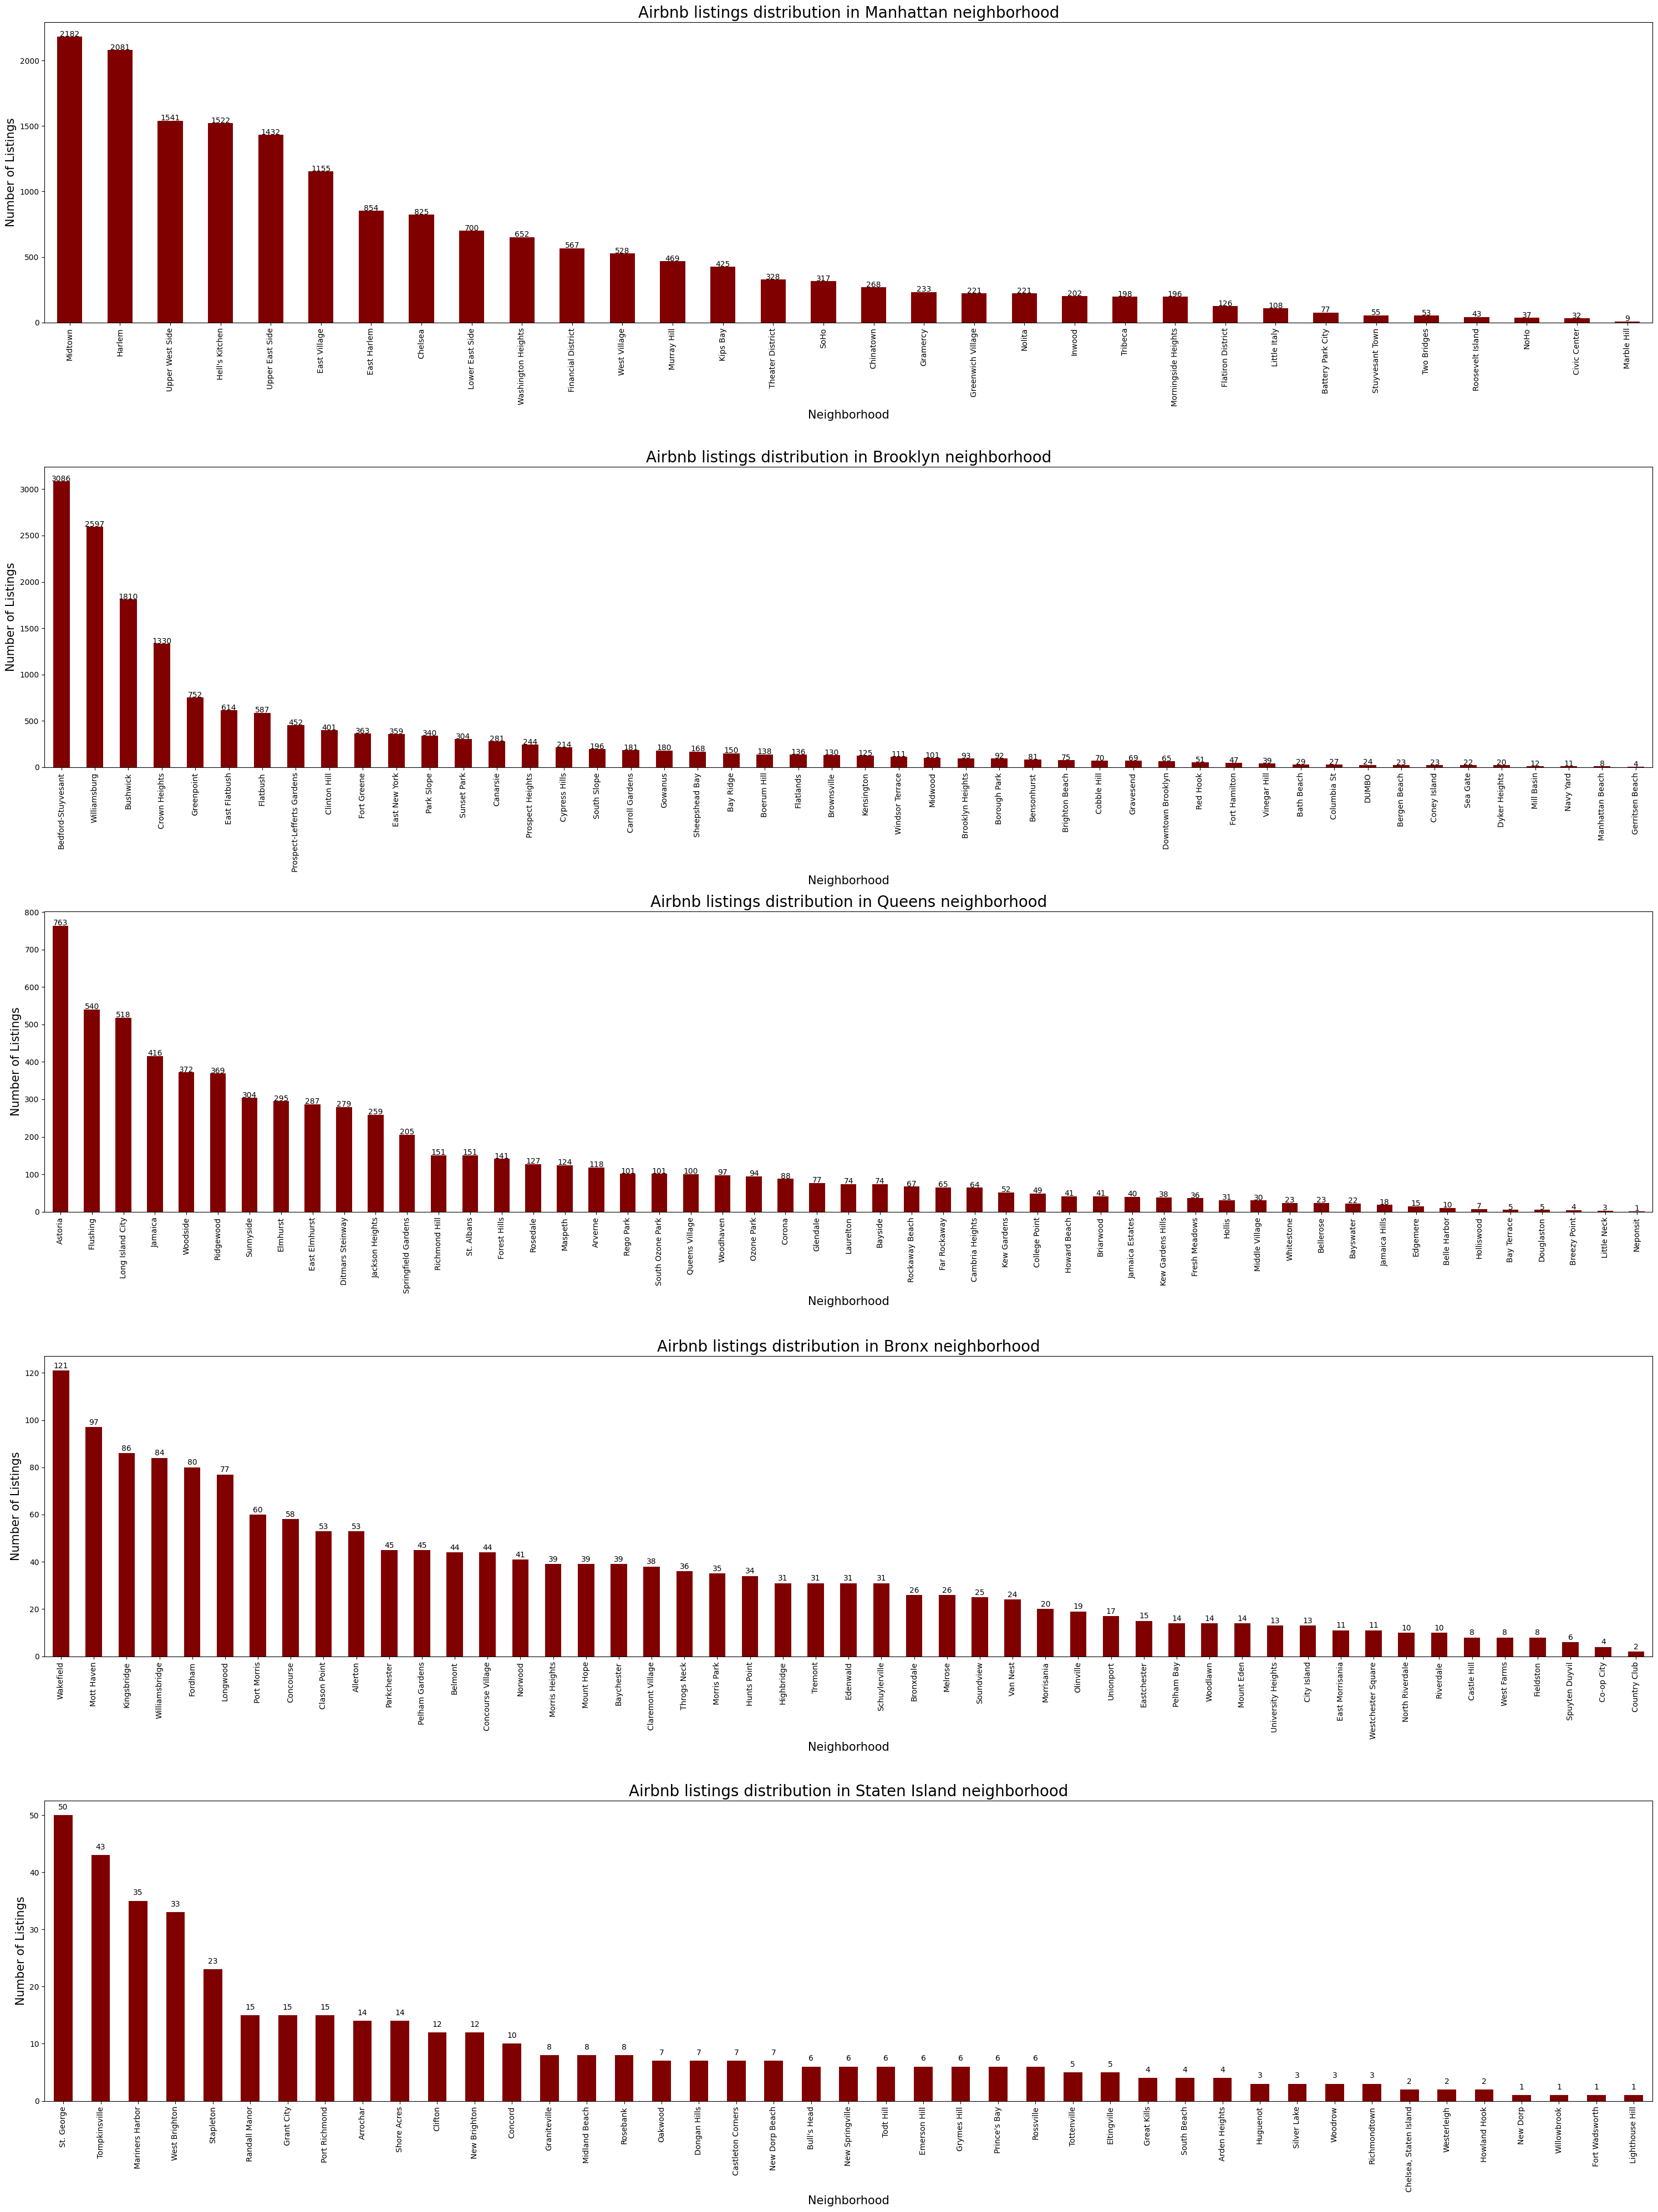

In [ ]:
#Get the list of unique neighborhood groups.
neighborhoodGroups = geo_listings['neighbourhood_group'].unique()
#Create subplots for the bar charts.
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(30, 40))

#Iterate over each neighborhood group.
for i, neighborhoodGroup in enumerate(neighborhoodGroups):
    #Filter neighborhoods to corresponding neighborhood groups. 
    neighborhoods_groups = geo_listings[geo_listings['neighbourhood_group'] == neighborhoodGroup]
    #Calculate the count of listings within each neighborhood.
    neighborhood_counts = neighborhoods_groups['neighbourhood'].value_counts()

    #Create a bar chart for each neighborhood group.
    ax = axs[i]
    neighborhood_counts.plot(kind='bar', ax=ax, color="maroon")
    ax.set_title("Airbnb listings distribution in {} neighborhood".format(neighborhoodGroup), fontsize=20)
    ax.set_xlabel('Neighborhood', fontsize=15)
    ax.set_ylabel('Number of Listings', fontsize=15)

    #Add count labels on top of each bar.
    for i, v in enumerate(neighborhood_counts):
        ax.text(i, v + 1, str(v), color='black', ha='center')

plt.tight_layout()
plt.show()

**Distributions of Airbnb listings in each neighbourhood group.**

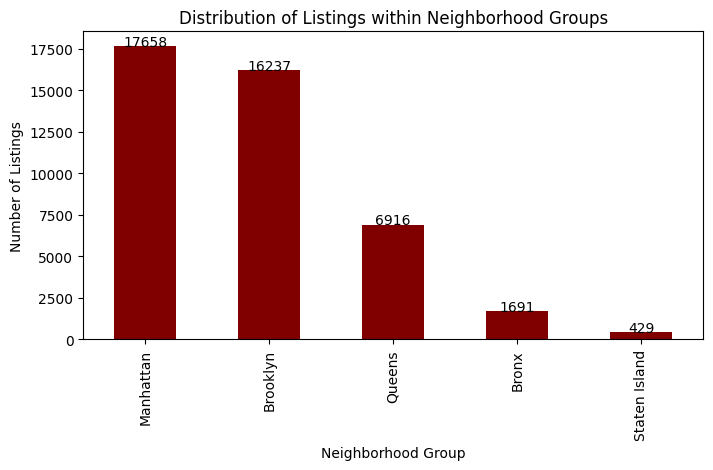

In [ ]:
#Calculate the count of listings within each neighborhood group.
groupCounts = listings['neighbourhood_group'].value_counts()
plt.figure(figsize=(8, 4))
ax = groupCounts.plot(kind='bar', color='maroon')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.title('Distribution of Listings within Neighborhood Groups')

#Add count labels on top of each bar
for i, v in enumerate(groupCounts):
    ax.text(i, v + 1, str(v), color='black', ha='center')
plt.show()

## **Geospatial map for each Neighbourhood_group and high priced Airbnb listings.**

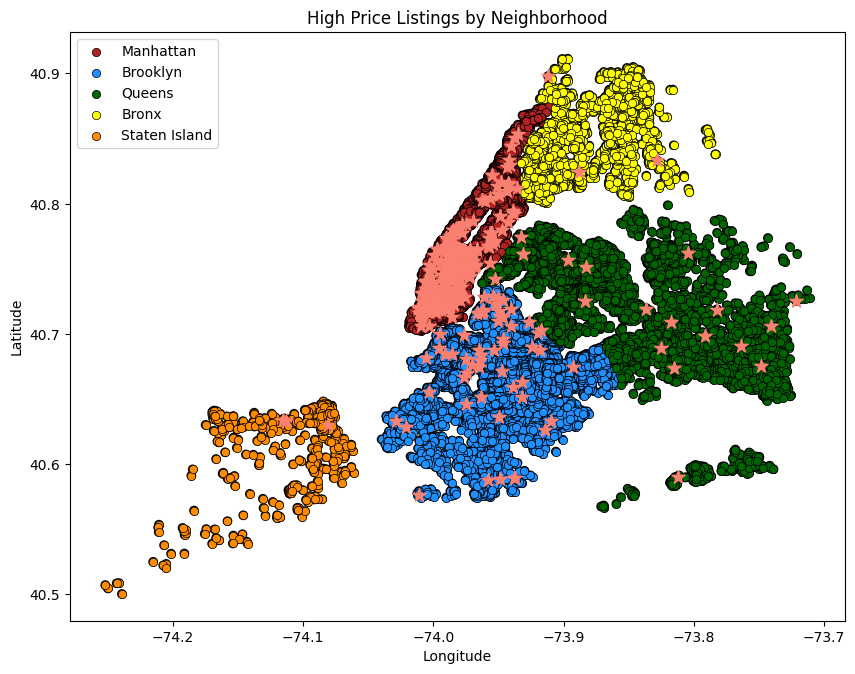

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

#Assign colors to neighbourhood_group.
groups = geo_listings['neighbourhood_group'].unique()
colors = ['firebrick', 'DodgerBlue', 'DarkGreen', 'yellow', 'DarkOrange'][:len(groups)]
colorDict = {group: color for group, color in zip(groups, colors)}

#Plot the NYC boundaries.
geo_listings.plot(ax=ax, color='none', edgecolor='black', linewidth=1)

#Plot the neighbourhood_group polygons with assigned colors and labels.
for group, color in colorDict.items():
    geo_listings[geo_listings['neighbourhood_group'] == group].plot(ax=ax, color=color, edgecolor='black', linewidth=0.5, label=group, legend=True)

#Add pinpoint markers for high priced listings.
high_pricedListings = geo_listings[geo_listings['price'] > 1262]
high_pricedListings.plot(ax=ax, color='salmon', marker='*', markersize=100)

ax.set_title('High Price Listings by Neighborhood')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.legend()
plt.show()

## **Calculated_host_listing_count and Host_name attributes.**

**Distribution of total Airbnb listings each host has.**

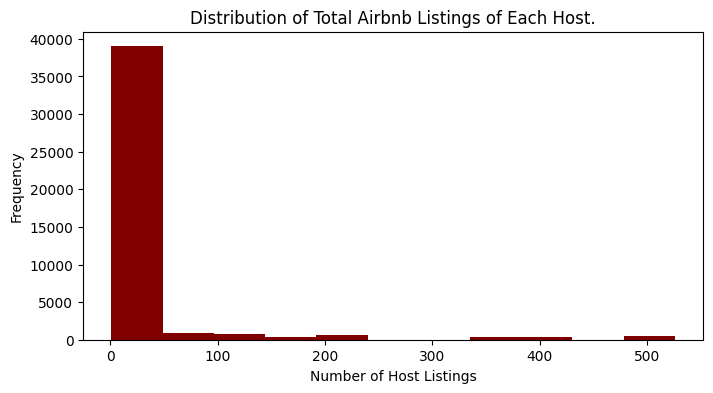

In [ ]:
#Plot histogram of 'calculated_host_listings_count'.
plt.figure(figsize=(8, 4))
plt.hist(listings['calculated_host_listings_count'], bins=11, color='maroon')
plt.xlabel('Number of Host Listings')
plt.ylabel('Frequency')
plt.title('Distribution of Total Airbnb Listings of Each Host.')
plt.show()

**Get the percentage of hosts corresponding to their Airbnb listings count.**

In [ ]:
#Get the unique values in the 'calculated_host_listings_count'.
listings_countValues = listings['calculated_host_listings_count'].unique()

countDict = {}
#Count the number of hosts for each unique value in 'calculated_host_listings_count'.
for value in listings_countValues:
    count = len(listings[listings['calculated_host_listings_count'] == value]['host_id'].unique())
    countDict[value] = count

#Get total number of host.
totalHosts = len(listings['host_id'].unique())
print(f" Total number of host: {totalHosts}")
percentageDict = {}

#Calculate the percentage of hosts for each value in 'calculated_host_listings_count'.
for value, count in countDict.items():
    percentage = (count / totalHosts) * 100
    percentageDict[value] = percentage

#Sort in descending order.
sorted_percentageDict = dict(sorted(percentageDict.items(), key=lambda x: x[0], reverse=True))
for value, percentage in sorted_percentageDict.items():
    print(f"Hosts with '{value}' listings: {percentage:.4f}%")

 Total number of host: 27455
Hosts with '526' listings: 0.0036%
Hosts with '394' listings: 0.0036%
Hosts with '356' listings: 0.0036%
Hosts with '222' listings: 0.0036%
Hosts with '207' listings: 0.0036%
Hosts with '192' listings: 0.0036%
Hosts with '178' listings: 0.0036%
Hosts with '159' listings: 0.0036%
Hosts with '131' listings: 0.0036%
Hosts with '124' listings: 0.0073%
Hosts with '120' listings: 0.0036%
Hosts with '113' listings: 0.0036%
Hosts with '107' listings: 0.0036%
Hosts with '101' listings: 0.0036%
Hosts with '88' listings: 0.0036%
Hosts with '83' listings: 0.0036%
Hosts with '76' listings: 0.0036%
Hosts with '69' listings: 0.0036%
Hosts with '63' listings: 0.0036%
Hosts with '62' listings: 0.0036%
Hosts with '59' listings: 0.0036%
Hosts with '57' listings: 0.0073%
Hosts with '54' listings: 0.0036%
Hosts with '53' listings: 0.0073%
Hosts with '51' listings: 0.0073%
Hosts with '48' listings: 0.0036%
Hosts with '47' listings: 0.0036%
Hosts with '44' listings: 0.0073%
Hosts

**Get host_name that has more than 100 Airbnb listings.**

In [ ]:
highListings_count = listings[listings['calculated_host_listings_count'] > 100]

#Count of occurrences for each unique combination of 'calculated_host_listings_count' and 'host_name'.
highListings_hosts = highListings_count.groupby(['calculated_host_listings_count', 'host_name']).size()
for (listings_count, host_name), count in highListings_hosts.items():
    print(f"Host: {host_name.ljust(25)}Listings Count: {str(listings_count).ljust(5)}")

Host: Justin                   Listings Count: 101  
Host: RoomPicks By Antony      Listings Count: 107  
Host: Ken                      Listings Count: 113  
Host: RoomPicks By Victoria    Listings Count: 120  
Host: Kaz                      Listings Count: 124  
Host: Stay With Vibe           Listings Count: 124  
Host: Jeniffer                 Listings Count: 131  
Host: Urban Furnished          Listings Count: 159  
Host: Momoyo                   Listings Count: 178  
Host: Shogo                    Listings Count: 192  
Host: Hiroki                   Listings Count: 207  
Host: June                     Listings Count: 222  
Host: RoomPicks                Listings Count: 356  
Host: Eugene                   Listings Count: 394  
Host: Blueground               Listings Count: 526  


## **Room_type attribute.**

**Distributiion of room_type.**

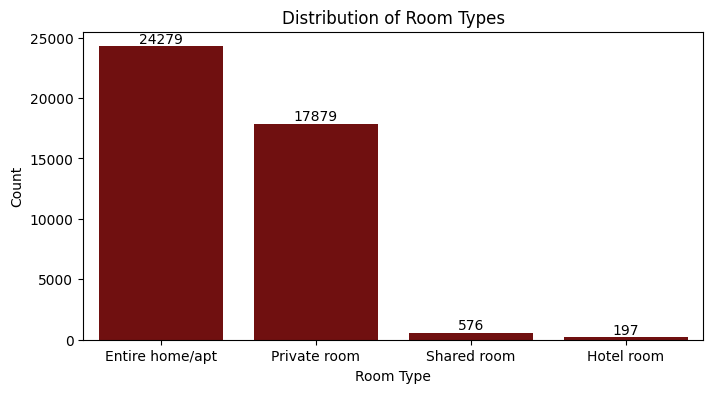

In [ ]:
room_typeCounts = listings['room_type'].value_counts()

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=room_typeCounts.index, y=room_typeCounts.values, color='maroon')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Distribution of Room Types')
for i, count in enumerate(room_typeCounts.values):
    ax.text(i, count, str(count), ha='center', va='bottom')
plt.show()

**Distribution of room_type with average price for each room_type.**

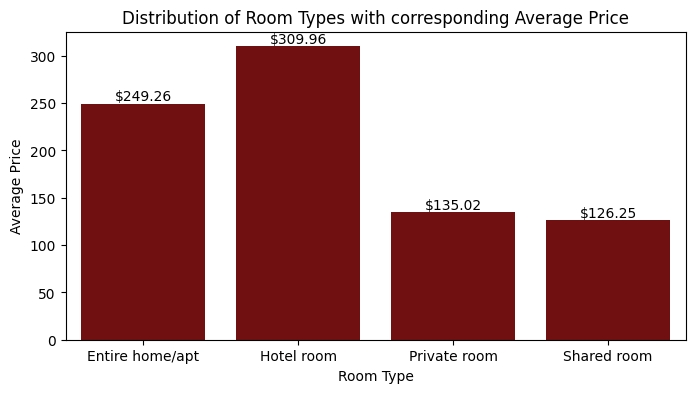

In [ ]:
#Calculate the average price for each room type.
averagePrices = listings.groupby('room_type')['price'].mean()
plt.figure(figsize=(8, 4))
ax = sns.barplot(x=averagePrices.index, y=averagePrices.values, color='maroon')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Distribution of Room Types with corresponding Average Price')

#Add average price labels on top of each bar.
for i, price in enumerate(averagePrices.values):
    ax.text(i, price, f"${price:.2f}", ha='center', va='bottom')
plt.show()

## **Geospatial map for Airbnb room types.**

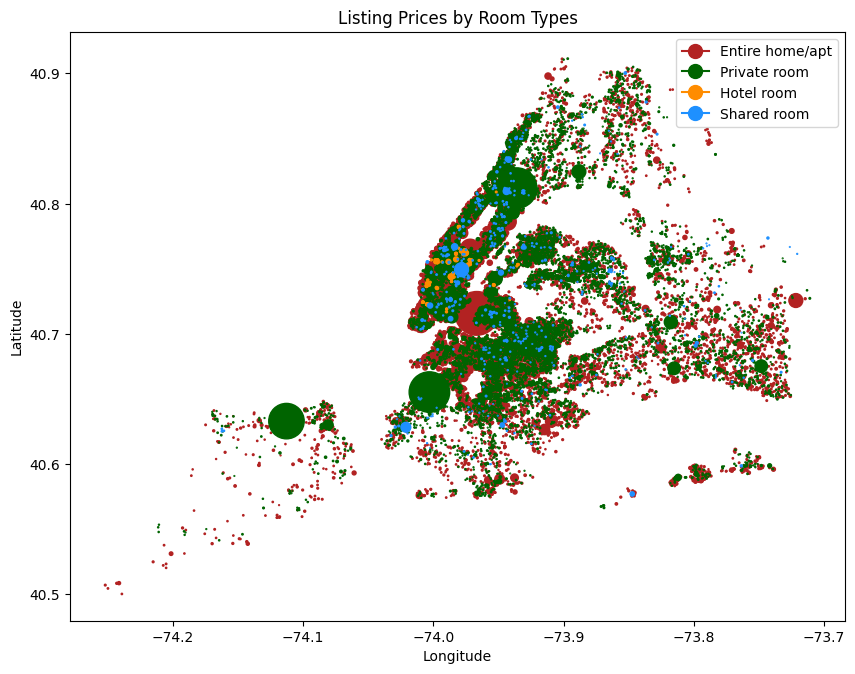

In [ ]:
import matplotlib.lines as mlines
fig, ax = plt.subplots(figsize=(10, 10))

#Define colors/markers for different room types
room_typeColors = {'Entire home/apt': 'firebrick', 'Private room': 'DarkGreen', 'Hotel room': 'DarkOrange', 'Shared room': 'DodgerBlue'}

#Plot listings with 'Entire home/apt' room type.
entireHome = geo_listings[geo_listings['room_type'] == 'Entire home/apt']
entireHome.plot(ax=ax, color=room_typeColors['Entire home/apt'], marker='o', label='Entire home/apt', markersize=entireHome['price']/100)

#Plot listings with 'Private room' room type.
privateRoom = geo_listings[geo_listings['room_type'] == 'Private room']
privateRoom.plot(ax=ax, color=room_typeColors['Private room'], marker='o', label='Private room', markersize=privateRoom['price']/100)

#Plot listings with 'Hotel room' room type.
hotelRoom = geo_listings[geo_listings['room_type'] == 'Hotel room']
hotelRoom.plot(ax=ax, color=room_typeColors['Hotel room'], marker='o', label='Hotel room', markersize=hotelRoom['price']/100)

#Plot listings with 'Shared room' room type.
sharedRoom = geo_listings[geo_listings['room_type'] == 'Shared room']
sharedRoom.plot(ax=ax, color=room_typeColors['Shared room'], marker='o', label='Shared room', markersize=sharedRoom['price']/100)

ax.set_title('Listing Prices by Room Types')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
legendHandles = [mlines.Line2D([], [], color='firebrick', marker='o', markersize=10, label='Entire home/apt'),
                mlines.Line2D([], [], color='DarkGreen', marker='o', markersize=10, label='Private room'),
                mlines.Line2D([], [], color='DarkOrange', marker='o', markersize=10, label='Hotel room'),
                mlines.Line2D([], [], color='DodgerBlue', marker='o', markersize=10, label='Shared room')]
ax.legend(handles=legendHandles)
plt.show()

## **Price attribute.**

**Distribution of Price attribute.**

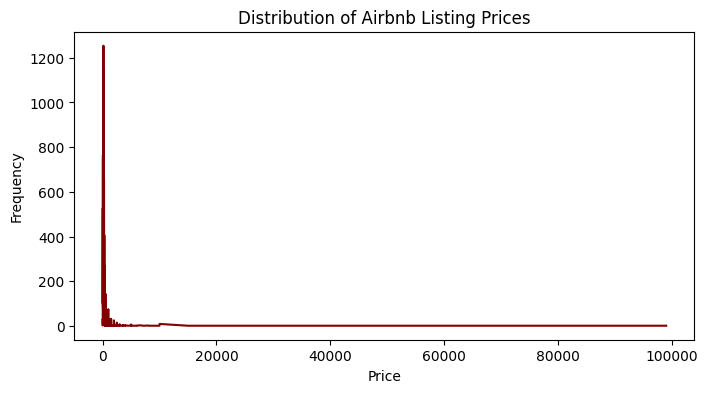

In [ ]:
priceCounts = listings['price'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
plt.plot(priceCounts.index, priceCounts.values, color='maroon')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Listing Prices')
plt.show()

**Get Percentile distribution for 'price' attribute.**

In [ ]:
percentilesPrice = np.percentile(listings['price'], range(101))
for i, percentile in enumerate(percentilesPrice):
    print(f"Percentile {i}: {percentile}")

Percentile 0: 0.0
Percentile 1: 30.0
Percentile 2: 34.0
Percentile 3: 36.0
Percentile 4: 39.0
Percentile 5: 40.0
Percentile 6: 42.0
Percentile 7: 45.0
Percentile 8: 45.0
Percentile 9: 49.0
Percentile 10: 50.0
Percentile 11: 50.0
Percentile 12: 54.0
Percentile 13: 55.0
Percentile 14: 57.0
Percentile 15: 59.0
Percentile 16: 60.0
Percentile 17: 61.0
Percentile 18: 65.0
Percentile 19: 65.0
Percentile 20: 68.0
Percentile 21: 70.0
Percentile 22: 70.0
Percentile 23: 72.0
Percentile 24: 75.0
Percentile 25: 75.0
Percentile 26: 78.0
Percentile 27: 80.0
Percentile 28: 80.0
Percentile 29: 83.0
Percentile 30: 85.0
Percentile 31: 87.0
Percentile 32: 89.0
Percentile 33: 90.0
Percentile 34: 92.0
Percentile 35: 95.0
Percentile 36: 96.0
Percentile 37: 99.0
Percentile 38: 100.0
Percentile 39: 100.0
Percentile 40: 100.0
Percentile 41: 103.0
Percentile 42: 106.0
Percentile 43: 110.0
Percentile 44: 110.0
Percentile 45: 115.0
Percentile 46: 117.0
Percentile 47: 120.0
Percentile 48: 120.0
Percentile 49: 123.0

In [ ]:
#Get listings that has price above the 99 percentile, greater than $1262.
listings[listings['price'] > 1262]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
239,174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Manhattan,Upper West Side,40.775100,-73.985950,Entire home/apt,2500,30,26,2016-01-20,0.19,10,364,0,NaN
310,278090,Furnished room for rent - Manhattan,1451723,Bia,Manhattan,East Harlem,40.792410,-73.938050,Private room,5065,30,269,2023-01-03,2.00,2,309,15,NaN
740,664047,Lux 2Bed/2.5Bath Central Park Views,836168,Henry,Manhattan,Upper West Side,40.774930,-73.987320,Entire home/apt,2500,30,59,2016-01-28,0.46,10,364,0,NaN
744,619144,Central Park View From High Floor,1028165,Yuichi,Manhattan,Hell's Kitchen,40.766910,-73.983610,Shared room,2000,30,2,2013-07-20,0.02,1,0,0,NaN
1041,893413,Architecturally Stunning Former Synagogue!,4751930,Martin,Manhattan,East Village,40.726940,-73.981730,Entire home/apt,2643,30,32,2023-01-08,0.31,1,179,3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42723,838394410576749777,"Comfort and Luxury! 3 Spaces, Pets are Allowed",496944100,RoomPicks,Manhattan,Midtown,40.755270,-73.981124,Entire home/apt,1329,1,0,NaN,NaN,356,283,0,NaN
42728,838394457862386158,Located in the Heart of Midtown! ! 3 Spaces,496944100,RoomPicks,Manhattan,Midtown,40.755066,-73.981267,Entire home/apt,1293,1,0,NaN,NaN,356,283,0,NaN
42776,837184127339894965,Lux 1bed apt near Lincoln Center,494885014,Juan,Manhattan,Upper West Side,40.773002,-73.988912,Entire home/apt,3006,3,0,NaN,NaN,1,0,0,NaN
42792,837494975544602824,2500 sq ft event space,410466990,Luxyouree,Brooklyn,East Flatbush,40.651463,-73.931529,Entire home/apt,1500,1,0,NaN,NaN,1,365,0,NaN


## **Minimum_nights attribute.**

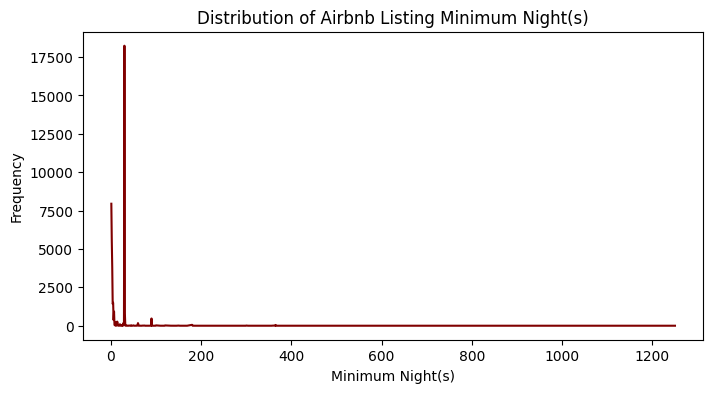

In [ ]:
nightCounts = listings['minimum_nights'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
plt.plot(nightCounts.index, nightCounts.values, color='maroon')
plt.xlabel('Minimum Night(s)')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Listing Minimum Night(s)')
plt.show()

In [ ]:
nightCounts = listings['minimum_nights'].value_counts().sort_values()
print(f"Night count frequency: \n{nightCounts}")

Night count frequency: 
280        1
88         1
48         1
273        1
36         1
       ...  
5       1499
3       3814
2       5524
1       7946
30     18235
Name: minimum_nights, Length: 128, dtype: int64


**Get Percentile distribution for 'minimum_nights' attribute.**

In [ ]:
percentilesNight = np.percentile(listings['minimum_nights'], range(101))
for i, percentile in enumerate(percentilesNight):
    print(f"Percentile {i}: {percentile}")

Percentile 0: 1.0
Percentile 1: 1.0
Percentile 2: 1.0
Percentile 3: 1.0
Percentile 4: 1.0
Percentile 5: 1.0
Percentile 6: 1.0
Percentile 7: 1.0
Percentile 8: 1.0
Percentile 9: 1.0
Percentile 10: 1.0
Percentile 11: 1.0
Percentile 12: 1.0
Percentile 13: 1.0
Percentile 14: 1.0
Percentile 15: 1.0
Percentile 16: 1.0
Percentile 17: 1.0
Percentile 18: 1.0
Percentile 19: 2.0
Percentile 20: 2.0
Percentile 21: 2.0
Percentile 22: 2.0
Percentile 23: 2.0
Percentile 24: 2.0
Percentile 25: 2.0
Percentile 26: 2.0
Percentile 27: 2.0
Percentile 28: 2.0
Percentile 29: 2.0
Percentile 30: 2.0
Percentile 31: 2.0
Percentile 32: 3.0
Percentile 33: 3.0
Percentile 34: 3.0
Percentile 35: 3.0
Percentile 36: 3.0
Percentile 37: 3.0
Percentile 38: 3.0
Percentile 39: 3.0
Percentile 40: 3.0
Percentile 41: 4.0
Percentile 42: 4.0
Percentile 43: 4.0
Percentile 44: 5.0
Percentile 45: 5.0
Percentile 46: 5.0
Percentile 47: 5.0
Percentile 48: 7.0
Percentile 49: 7.0
Percentile 50: 7.0
Percentile 51: 14.0
Percentile 52: 20.0
P

In [ ]:
#Get listings that has price above the 99 percentile, greater than 30 days.
listings[listings['minimum_nights'] > 90]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
25,33156,"Sunny, Clean Zen Home w pr.Bath",128669,Alex,Manhattan,Upper West Side,40.787630,-73.968620,Entire home/apt,139,120,20,2020-10-14,0.14,1,0,0,NaN
187,61509,"Quiet, clean midtown apt w. elevato",23619,Anna/Fonzy,Manhattan,Midtown,40.757430,-73.968250,Entire home/apt,110,200,92,2019-04-30,0.62,1,0,0,NaN
265,232775,Stunning 1 BR Loft Williamsburg Bedford L,842156,Alyssa & Dion,Brooklyn,Williamsburg,40.721130,-73.956580,Entire home/apt,195,181,4,2013-05-07,0.03,1,145,0,NaN
289,271694,"Easy, comfortable studio in Midtown",1387370,James,Manhattan,Midtown,40.752820,-73.973150,Entire home/apt,125,365,19,2015-09-08,0.14,1,0,0,NaN
417,258690,CHELSEA 1 Bdrm Plus Sleeping Loft!!,1359611,Andrea,Manhattan,Chelsea,40.746420,-74.004110,Entire home/apt,195,365,10,2014-10-26,0.08,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40939,809457478921671235,"New Lux Apt, heart of Brooklyn",9262949,Nisha,Brooklyn,DUMBO,40.701729,-73.986217,Entire home/apt,200,210,0,NaN,NaN,1,363,0,NaN
41373,817378848006439678,3 Bedroom 1 Bathroom Shared Garden Apt Park Slope,171051361,Elizabeth,Brooklyn,South Slope,40.663694,-73.981528,Entire home/apt,150,180,0,NaN,NaN,2,358,0,NaN
41582,816897152453807680,Cozy Corner (Room 2),215837608,Jamila,Brooklyn,East New York,40.655671,-73.897456,Private room,49,100,1,2023-03-01,1.00,3,252,1,NaN
42150,831118058290339602,401 E 34th Street - One Bedroom,249525924,Eli,Manhattan,Murray Hill,40.743587,-73.972533,Private room,75,240,0,NaN,NaN,2,365,0,NaN


In [ ]:
longterm_averagePrice = listings[listings['minimum_nights'] > 90]['price'].mean()
print(f"Average price for listings with minimum nights > 90: ${longterm_averagePrice:.2f}")

Average price for listings with minimum nights > 90: $250.78


## **Availability_365 attribute.**

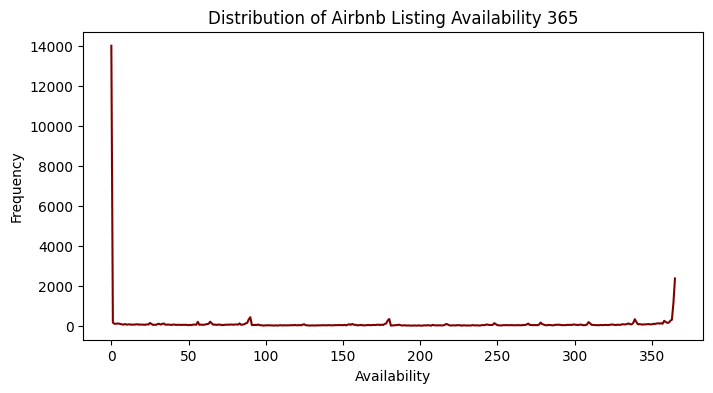

In [ ]:
availCounts = listings['availability_365'].value_counts().sort_index()
plt.figure(figsize=(8, 4))
plt.plot(availCounts.index, availCounts.values, color='maroon')
plt.xlabel('Availability')
plt.ylabel('Frequency')
plt.title('Distribution of Airbnb Listing Availability 365')
plt.show()

In [ ]:
availCounts = listings['availability_365'].value_counts().sort_values()
print(f"Night count frequency: \n{availCounts}")

Night count frequency: 
207       18
227       18
198       22
201       22
194       23
       ...  
180      352
90       442
364     1152
365     2377
0      13990
Name: availability_365, Length: 366, dtype: int64


## **Number_of_reviews, Last_reviews, Reviews_per_month, Number_of_reviews_ltm attributes.**

**Scatterplot Price vs. Number_of_reviews.**

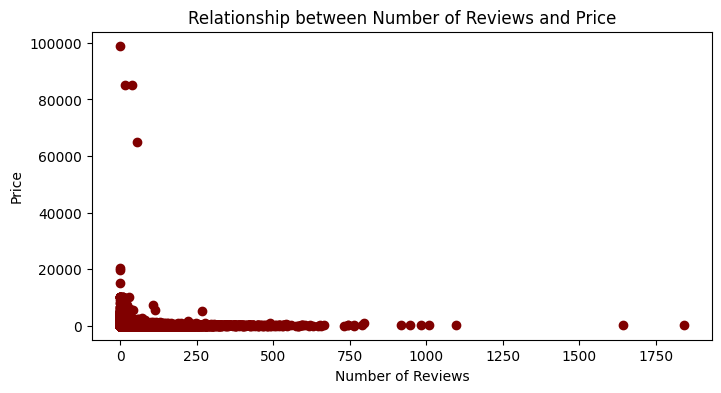

In [ ]:
plt.figure(figsize=(8, 4))
plt.scatter(listings['number_of_reviews'], listings['price'], color='maroon')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Relationship between Number of Reviews and Price')
plt.show()

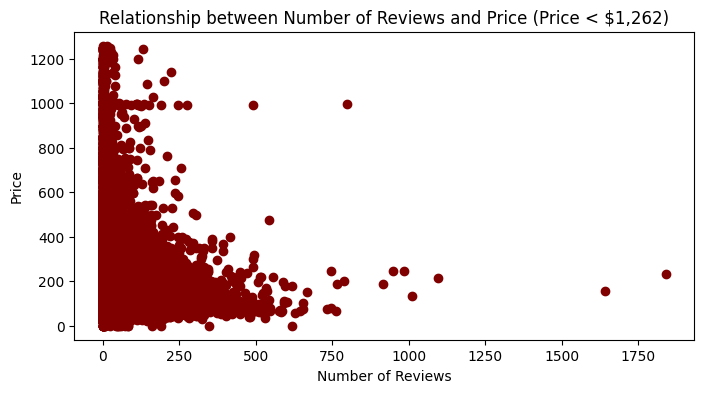

In [ ]:
filteredReviews = listings['number_of_reviews'][listings['price'] < 1262]
filteredPrices = listings['price'][listings['price'] < 1262]

plt.figure(figsize=(8, 4))
plt.scatter(filteredReviews, filteredPrices, color='maroon')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.title('Relationship between Number of Reviews and Price (Price < $1,262)')
plt.show()

**Scatterplot Last_review Date vs Number_of_reviews.**

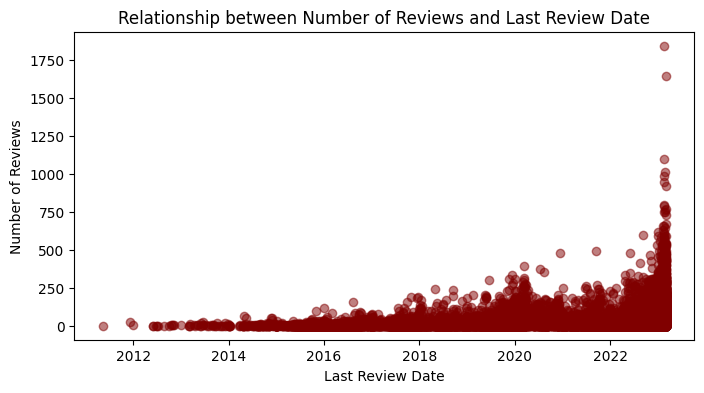

In [ ]:
#Convert 'last_review' column to datetime.
listings['last_review'] = pd.to_datetime(listings['last_review'])
plt.figure(figsize=(8, 4))
plt.scatter(listings['last_review'], listings['number_of_reviews'], color='maroon', alpha=0.5)
plt.xlabel('Last Review Date')
plt.ylabel('Number of Reviews')
plt.title('Relationship between Number of Reviews and Last Review Date')
plt.show()

**Get the listing with highest Number of Reviews.**

In [ ]:
#Find the index of the listing with the highest number of reviews.
max_total_reviewsIndex = listings['number_of_reviews'].idxmax()

#Get the corresponding listing.
max_total_reviewsListing = listings.loc[max_total_reviewsIndex]
max_total_reviewsListing

id                                                              44799007
name                              Sonder Battery Park | Studio Apartment
host_id                                                        219517861
host_name                                                   Sonder (NYC)
neighbourhood_group                                            Manhattan
neighbourhood                                         Financial District
latitude                                                        40.70617
longitude                                                      -74.01486
room_type                                                Entire home/apt
price                                                                234
minimum_nights                                                         2
number_of_reviews                                                   1842
last_review                                                   2023-02-19
reviews_per_month                                  

In [ ]:
percentilesReviews = np.percentile(listings['number_of_reviews'], range(101))
for i, percentile in enumerate(percentilesReviews):
    print(f"Percentile {i}: {percentile}")

Percentile 0: 0.0
Percentile 1: 0.0
Percentile 2: 0.0
Percentile 3: 0.0
Percentile 4: 0.0
Percentile 5: 0.0
Percentile 6: 0.0
Percentile 7: 0.0
Percentile 8: 0.0
Percentile 9: 0.0
Percentile 10: 0.0
Percentile 11: 0.0
Percentile 12: 0.0
Percentile 13: 0.0
Percentile 14: 0.0
Percentile 15: 0.0
Percentile 16: 0.0
Percentile 17: 0.0
Percentile 18: 0.0
Percentile 19: 0.0
Percentile 20: 0.0
Percentile 21: 0.0
Percentile 22: 0.0
Percentile 23: 0.0
Percentile 24: 0.1999999999989086
Percentile 25: 1.0
Percentile 26: 1.0
Percentile 27: 1.0
Percentile 28: 1.0
Percentile 29: 1.0
Percentile 30: 1.0
Percentile 31: 1.0
Percentile 32: 1.0
Percentile 33: 1.0
Percentile 34: 1.0
Percentile 35: 2.0
Percentile 36: 2.0
Percentile 37: 2.0
Percentile 38: 2.0
Percentile 39: 2.0
Percentile 40: 2.0
Percentile 41: 2.0
Percentile 42: 3.0
Percentile 43: 3.0
Percentile 44: 3.0
Percentile 45: 3.0
Percentile 46: 4.0
Percentile 47: 4.0
Percentile 48: 4.0
Percentile 49: 4.0
Percentile 50: 5.0
Percentile 51: 5.0
Percent

## **Geospatial map for Airbnb listings with high reviews.**

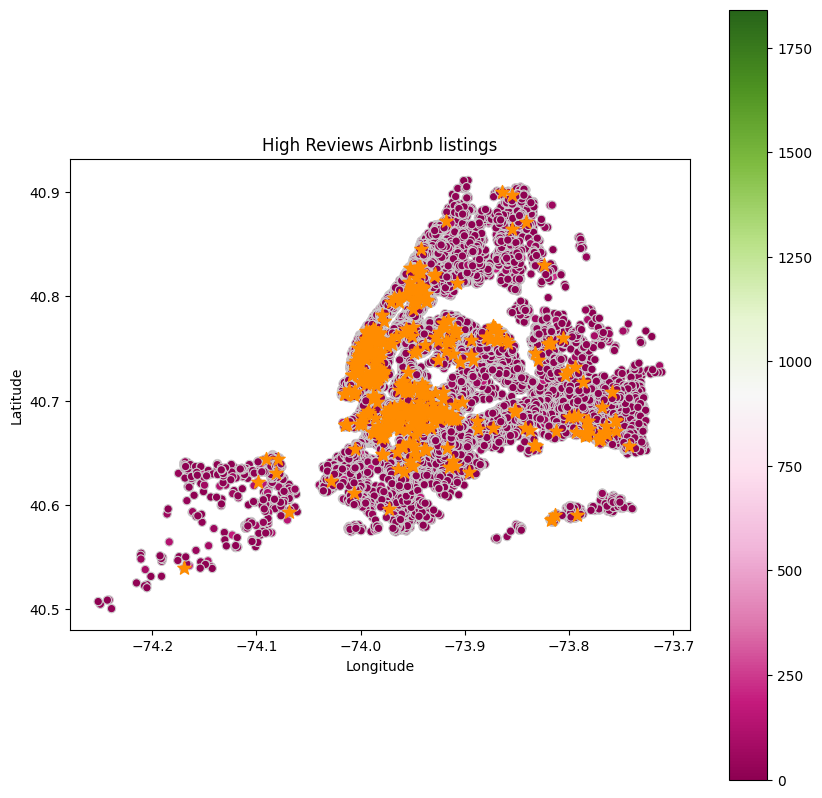

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

#Plot the 'number_of_reviews' column.
geo_listings.plot(column='number_of_reviews', cmap='PiYG', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

#Add pinpoint markers for listings with more than 270 reviews. 
highReviews = geo_listings[geo_listings['number_of_reviews'] > 270]
highReviews.plot(ax=ax, color='DarkOrange', marker='*', markersize=100)
ax.set_title('High Reviews Airbnb listings')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

**Get the listing with highest Reviews per Month.**

In [ ]:
#Find the index of the listing with the highest reviews per month.
max_month_reviewsIndex = listings['reviews_per_month'].idxmax()

#Get the corresponding listing.
max_month_reviewsListing = listings.loc[max_month_reviewsIndex]
max_month_reviewsListing

id                                                        53843545
name                              Skyline views in Lower Manhattan
host_id                                                  435369966
host_name                                      Millennium Downtown
neighbourhood_group                                      Manhattan
neighbourhood                                   Financial District
latitude                                                 40.710026
longitude                                                -74.01136
room_type                                             Private room
price                                                          213
minimum_nights                                                   1
number_of_reviews                                             1097
last_review                                    2023-02-19 00:00:00
reviews_per_month                                            86.61
calculated_host_listings_count                                

**Get the listing with highest Number of Reviews (last 12 months).**

In [ ]:
#Find the index of the listing with the highest number of reviews (ltm).
max_ltm_reviewsIndex = listings['number_of_reviews_ltm'].idxmax()

#Get the corresponding listing.
max_ltm_reviewsListing = listings.loc[max_ltm_reviewsIndex]
max_ltm_reviewsListing

id                                                        53843545
name                              Skyline views in Lower Manhattan
host_id                                                  435369966
host_name                                      Millennium Downtown
neighbourhood_group                                      Manhattan
neighbourhood                                   Financial District
latitude                                                 40.710026
longitude                                                -74.01136
room_type                                             Private room
price                                                          213
minimum_nights                                                   1
number_of_reviews                                             1097
last_review                                    2023-02-19 00:00:00
reviews_per_month                                            86.61
calculated_host_listings_count                                

## **Scatterplot Matrix between all continous attributes.**

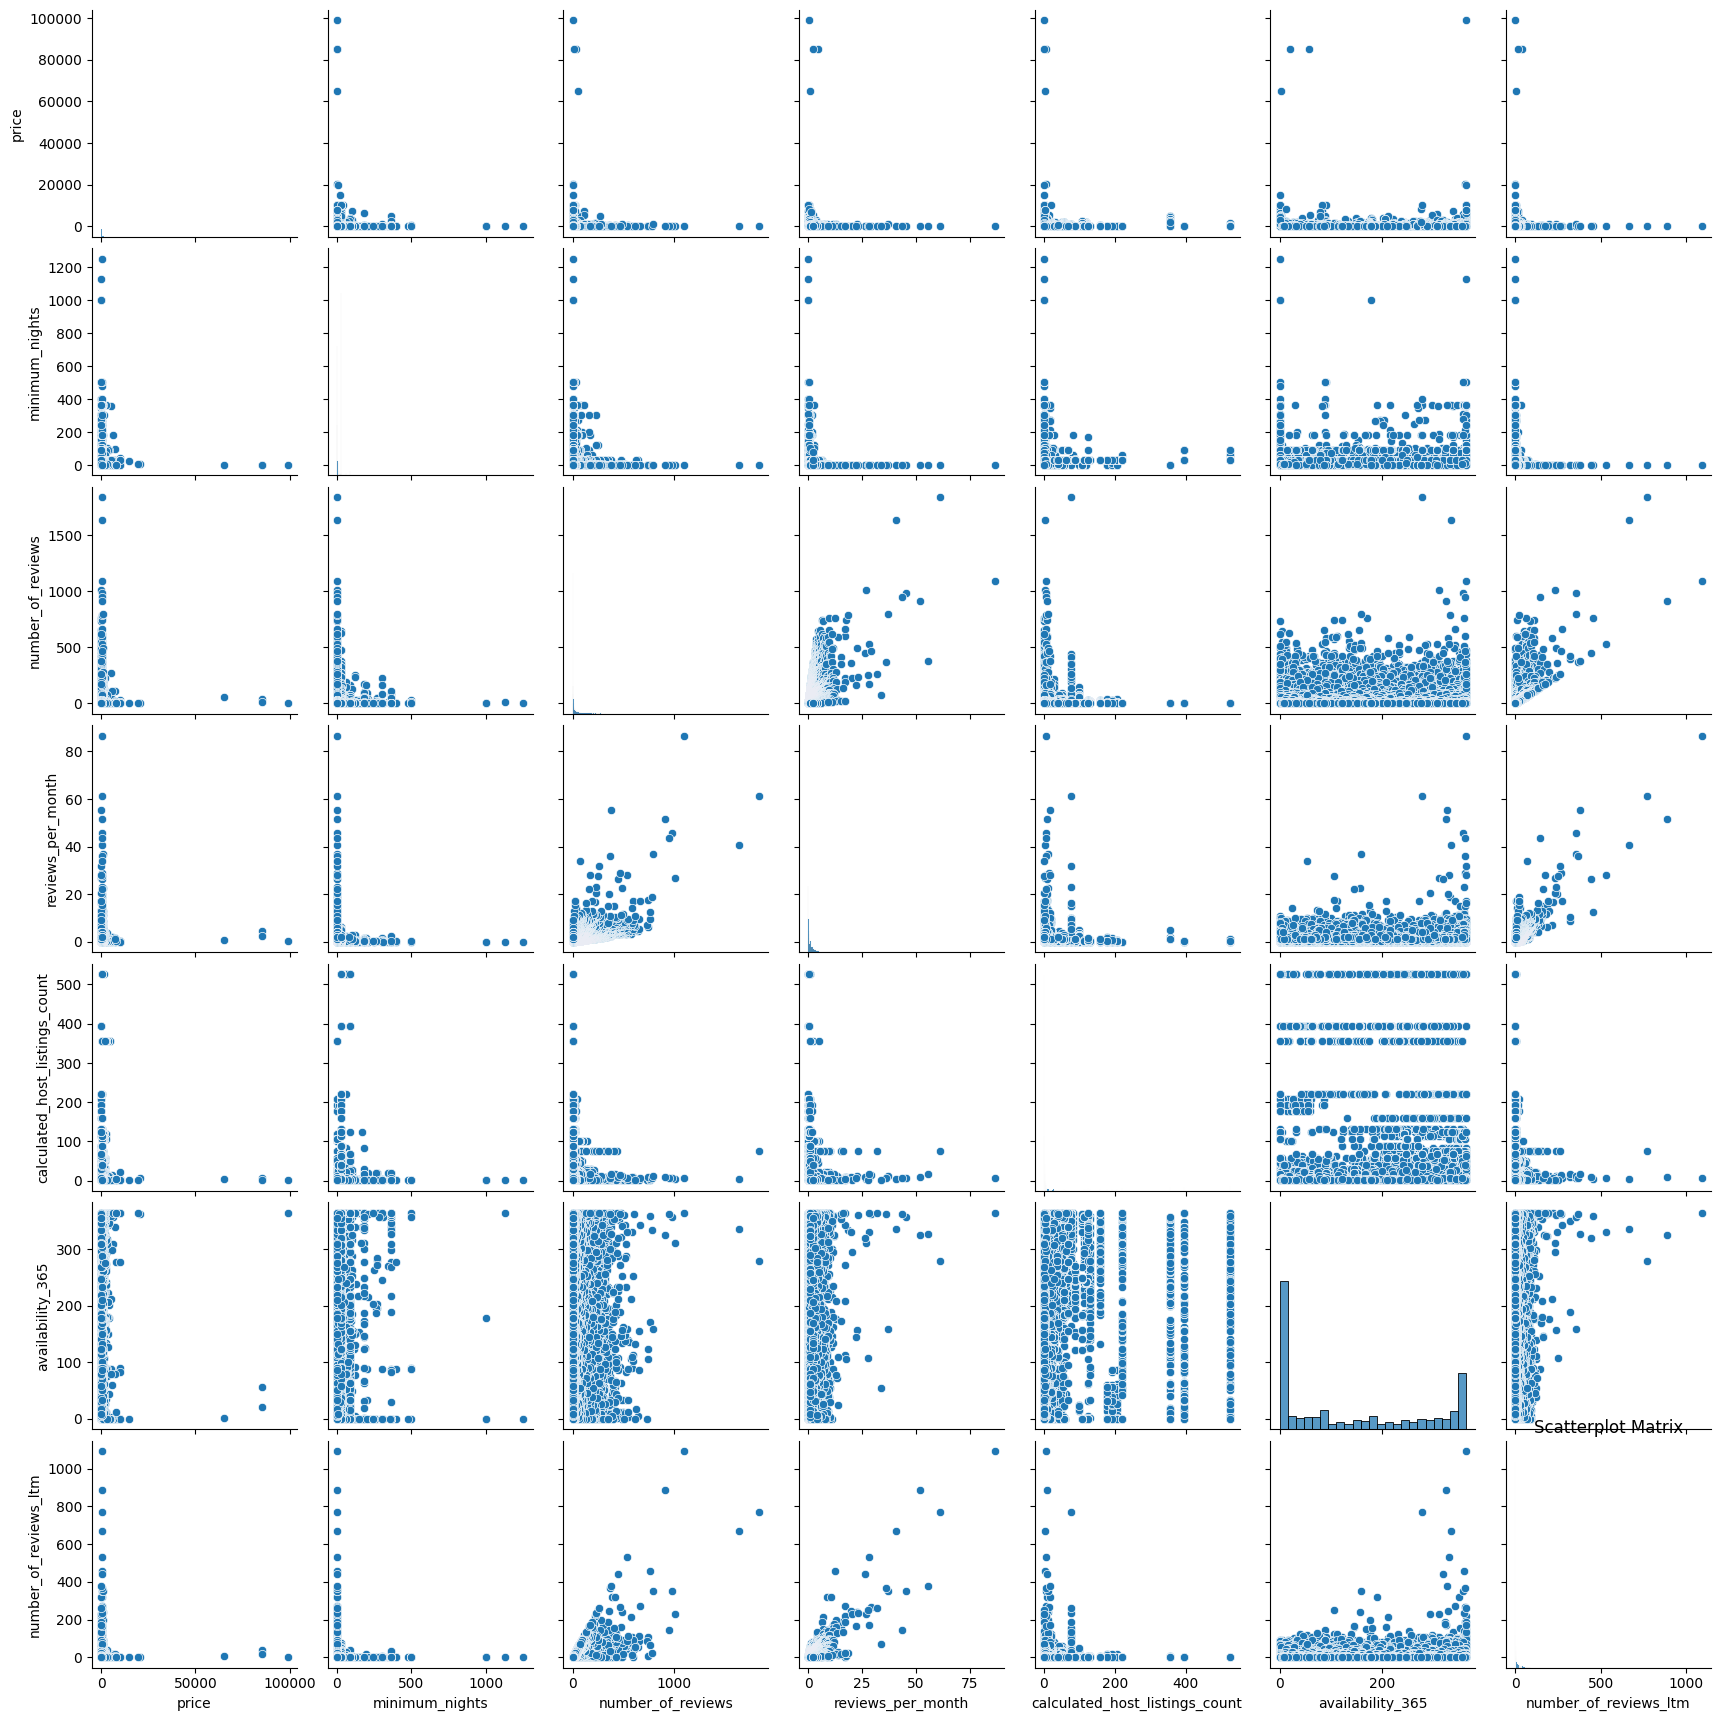

In [ ]:
contAttributes = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']
#Subset the DataFrame with the selected attributes
contAttributes_data = listings[contAttributes]
sns.pairplot(contAttributes_data)
plt.title("Scatterplot Matrix")
plt.show()

## **Final Dataset.**

In [ ]:
droppedColumns = ['number_of_reviews', 'last_review', 'reviews_per_month', 'number_of_reviews_ltm', 'license']
listingsData = listings.drop(droppedColumns, axis=1)
print (f" Final listings dataset shape: {listingsData.shape}")
listingsData.head(10)

 Final listings dataset shape: (42931, 13)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,3,314
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,2,365
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,1,0
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,1,106
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,1,181
5,29628,"Comfortable, Sunny Room",127608,Chris,Brooklyn,Clinton Hill,40.68292,-73.96381,Private room,93,3,1,145
6,5586,Rooftop Deck/City Views. Great Apt,8526,Susan,Manhattan,Upper East Side,40.76076,-73.96156,Entire home/apt,295,4,1,1
7,5803,"Lovely, Cozy, Room 1, BEST AREA; Legal Rental",9744,Laurie,Brooklyn,South Slope,40.66801,-73.98784,Private room,124,3,3,164
8,31130,Most Central Location!,117287,Lara Nicole,Manhattan,Hell's Kitchen,40.76720,-73.98464,Private room,200,1,4,310
9,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,81,30,1,207


In [ ]:
listingsData.drop('name', axis=1).describe(include="all")
#Generate descriptive statistics for all variables. 

,id,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
count,4.293100e+04,4.293100e+04,42926,42931,42931,42931.000000,42931.000000,42931,42931.000000,42931.000000,42931.000000,42931.000000
unique,NaN,NaN,9831,5,223,NaN,NaN,4,NaN,NaN,NaN,NaN
top,NaN,NaN,Blueground,Manhattan,Bedford-Stuyvesant,NaN,NaN,Entire home/apt,NaN,NaN,NaN,NaN
freq,NaN,NaN,526,17658,3086,NaN,NaN,24279,NaN,NaN,NaN,NaN
mean,2.222772e+17,1.516012e+08,NaN,NaN,NaN,40.728273,-73.943665,NaN,200.307167,18.111178,24.054809,140.262211
std,3.344213e+17,1.621301e+08,NaN,NaN,NaN,0.057640,0.056627,NaN,895.082911,27.462513,80.867958,142.001486
min,2.595000e+03,1.678000e+03,NaN,NaN,NaN,40.500314,-74.251907,NaN,0.000000,1.000000,1.000000,0.000000
25%,1.940474e+07,1.608533e+07,NaN,NaN,NaN,40.687485,-73.981750,NaN,75.000000,2.000000,1.000000,0.000000
50%,4.337482e+07,7.433812e+07,NaN,NaN,NaN,40.724040,-73.952620,NaN,125.000000,7.000000,1.000000,89.000000
75%,6.305016e+17,2.680692e+08,NaN,NaN,NaN,40.762293,-73.924035,NaN,200.000000,30.000000,4.000000,289.000000


In [ ]:
listingsData.isnull().sum()
#Check for missing values in the final dataset.

id                                 0
name                              12
host_id                            0
host_name                          5
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
calculated_host_listings_count     0
availability_365                   0
dtype: int64